In [3]:
import os
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [4]:
BasePath = "data/Example/"

In [5]:
Files = os.listdir(BasePath)
print(Files)
TestFile = os.listdir(BasePath + Files[1])
print(TestFile)

['transfer test (posttest)', 'knowledge test (posttest)', 'knowledge test (pretest)', 'process labels (during learning)', 'essay (during learning)', 'metacognitive knowledge test (pretest)']
['Deel 4-Vragenlijst C -cijfers.csv']


In [6]:
def clean_data(X, extra_columns = []):
    print(X.head())
    X.drop(X[X['Status'] != 'Beëindigd'].index, inplace = True)
    # Add Gebruikte tijd later again.
    cols = ['E-mailadres', 'Voornaam', 'Achternaam', 'Status', 'Gestart op', 'Voltooid', 'Gebruikte tijd']

    if extra_columns:
        for i in extra_columns:
            cols.append(i)

    X.drop(columns= cols, inplace = True)
    # I hate everything about this line
    X = X.replace(',','.', regex=True).replace('-', '0', regex=True).astype(float).astype(int)
    return X

def group_y(Y, total_options_of_y):
    val = int(total_options_of_y/3)
    print(len(Y))
    print(type(Y))
    for i, y in Y.items():
        if y <= val :
            Y[i] = 0
        elif y >= val and y <= (val*2):
            Y[i] = 1
        elif y >= (val*2):
            Y[i] = 2
    return Y

In [7]:
def split_data(x_data, y_data, test_size):
    X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_size)
    return X_train, X_test, y_train, y_test

def getXY(dataset, exclude):
    X = dataset.drop([exclude], axis=1)
    Y = dataset[exclude]

    return X, Y

def get_accuracy(Model, X, Y):
    predict_list = Model.predict(X)

    accuracy = accuracy_score(Y, predict_list)

    return accuracy, predict_list

In [8]:
Test = pd.read_csv(BasePath + Files[1] + "/" + TestFile[0])
print(Test)

# Remove all the nasty data
CleanTest = clean_data(Test)
CleanTest.head(n=2)

# Obtain X and Y to test effectiveness later
#X, y = getXY(CleanTest, "Cijfer/26,00")

# print(len(y))
# print(len(X))

#Y = group_y(y, 27)

# print(Y)
# print(len(Y))

# Obtain train Test data
# X_train, X_test, y_train, y_test = split_data(X, Y, 0.2)

             Achternaam Voornaam             E-mailadres     Status  \
0                    GE  fsp4232   fsp4232@localhost.com  Beëindigd   
1                    GE  fsp4230   fsp4230@localhost.com  Beëindigd   
2                    GE  fsp4228   fsp4228@localhost.com  Beëindigd   
3                    GE  fsp4227   fsp4227@localhost.com      Bezig   
4                    GE  fsp4226   fsp4226@localhost.com  Beëindigd   
5                    GE  fsp4223   fsp4223@localhost.com  Beëindigd   
6                    GE  fsp4222   fsp4222@localhost.com  Beëindigd   
7                    GE  fsp4221   fsp4221@localhost.com  Beëindigd   
8                    GE  fsp4220   fsp4220@localhost.com  Beëindigd   
9                    GE  fsp4219   fsp4219@localhost.com  Beëindigd   
10                   GE  fsp4217   fsp4217@localhost.com  Beëindigd   
11                   GE  fsp4216   fsp4216@localhost.com  Beëindigd   
12                   GE  fsp4215   fsp4215@localhost.com  Beëindigd   
13    

,"Cijfer/30,00","V. 1 /1,00","V. 2 /1,00","V. 3 /1,00","V. 4 /1,00","V. 5 /1,00","V. 6 /1,00","V. 7 /1,00","V. 8 /1,00","V. 9 /1,00",...,"V. 21 /1,00","V. 22 /1,00","V. 23 /1,00","V. 24 /1,00","V. 25 /1,00","V. 26 /1,00","V. 27 /1,00","V. 28 /1,00","V. 29 /1,00","V. 30 /1,00"
0,23,1,1,0,1,0,0,1,1,1,...,1,1,1,1,0,1,1,0,1,1
1,26,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1


In [9]:
# gm = GaussianMixture(n_components=3, random_state=0).fit(X)
#
# acc, predict = get_accuracy(gm, X, Y)
# print(acc)

## Some Random plotting tests

In [10]:
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
#
# #Load Data
# pca = PCA(2)
#
# #Initialize the class object
# kmeans = KMeans(n_clusters= 3)
#
# #predict the labels of clusters.
# label = kmeans.fit_predict(X)
#
# #Transform the data
# df = pca.fit_transform(X)
#
#
# #Getting unique labels
# u_labels = np.unique(label)
#
# #plotting the results:
# for i in u_labels:
#     plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
# plt.legend()
# plt.show()
#
# # kmeans = KMeans(n_clusters=27, random_state=0).fit(X)
#
# # acc = get_accuracy(gm, X_test, y_test)

## Lucas' Code time for fun and goodness (and maybe clustering based on specific features not from the test scores)

### using exclusively the ctrl+c and ctrl+v keys

In [11]:
# Now that we can cluster students based on the features extracted from the process lables (kind of they all seem to be in the -1 class?)
# We can now combine these features with the features extracted by Ylja and link them based on username

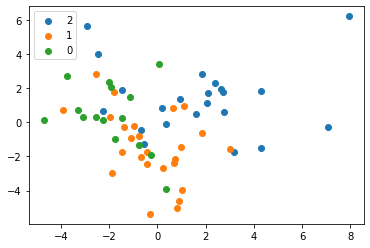

In [17]:
from sklearn.cluster import DBSCAN
import csv
from datetime import datetime
# which features will we use? lets set out some cognition features
# the two different goodness values can be knowledge gained or score in post-test
# lets first take in the process labesl

def fix(X):
    # making sure the users arent clustered on username
    try:
        X = X.drop(columns = ["Username"])
    except:
        pass
    X = (X-X.mean())/X.std()
    # filling the nan values
    X = X.fillna(0)
    return X

def load_process_features(c_file):

    # in study 3 there are two different studies (??) based on if its:
    # fsp3_2xx.patterns :  Username	Moodle ID	Session Start (ms)	Process Label	Process Start Time	Process End Time

    # fsg3_0xx.combined : logid	actionid	patternid	time	log label	action label	pattern label	pattern span	log value

    # fsc3_0xx.combined : logid	actionid	patternid	time	log label	action label	pattern label	pattern span	log value

    # i will just use the bottom two because they are the same and can just regex combined

    features = {}

    cleaned = []
    with open(BasePath_2 + c_file, newline='', encoding='utf8') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
        for row in spamreader:
            real = (', '.join(row))
            if real.count(",") == 9:
                cleaned.append(np.array(real.split(",")))
    cleaned = np.array(cleaned)
    data = pd.DataFrame(cleaned, columns = ["logid", "actionid", "patternid", "date", "time",	"log_label", "action_label", "pattern_label", "pattern_span", "log_value"])

    features["Username"] = c_file.split(",")[0]
    # creating the time spent column

    time = list(data["time"])
    time.insert(0, time[0])
    time_spent = []
    FMT = ' %H:%M:%S'
    for i in range(1,len(time)):
        tdelta = datetime.strptime(time[i], FMT) - datetime.strptime(time[i-1], FMT)
        time_spent.append(tdelta.total_seconds())

    data["Process_Time_Spent"] = time_spent
    proc_labels = np.unique(np.array(data["pattern_label"]))


    max_time = data["Process_Time_Spent"].sum()

    for proc in proc_labels:
        proc_rows = data[data["pattern_label"] == proc]

        # feature #1 total time spent on processes
        features[("Time_spent_"+proc)] = [proc_rows["Process_Time_Spent"].sum()]

        # feature #2 mean time per session process session
        features[("Mean_time_"+proc)] = [proc_rows["Process_Time_Spent"].mean()]

        # feature #3 amount of times they did a process
        features[("Times_performed_"+proc)] = [proc_rows["Process_Time_Spent"].count()]

        # feature #4 percentage of time spent on a process
        features[("Percent_time_"+proc)] = [proc_rows["Process_Time_Spent"].sum()/max_time]

    # return the features as a df
    return pd.DataFrame.from_dict(features)

def cluster(X, features):
    X = fix(X)
    # creating labels for the users

    # clustering = DBSCAN(eps=10.5, min_samples=2).fit(X)
    # return clustering.labels_

    kmeans = KMeans(n_clusters= 3)
    clustering = kmeans.fit_predict(X)

    return clustering

def create_X(user_df, labels):

    X = fix(user_df)

    labels = pd.DataFrame(labels)

    # selecting only the features the users chose
    # X = user_df[features_chosen]

    #Load Data into pca
    pca = PCA(2)

    #Transform the data into 2 dimensions
    X = pca.fit_transform(X)
    X = pd.DataFrame(X)

    result = pd.concat([X, labels], axis=1)

    result.columns = ['X', 'y', 'labels']

    return result

def plot(X):
    u_labels = X['labels'].unique()

    for i in u_labels:
        plt.scatter(X['X'].loc[X['labels'] == i],
                    X['y'].loc[X['labels'] == i],
                    label = i)
    plt.legend()
    plt.show()


# ==================== main
BasePath_2 = "data/Flora Data/Study 3/"
Files = os.listdir(BasePath_2)

# getting the combined files
combined_files = []
for x in Files:
    if "combined.csv" in x:
        combined_files.append(x)

users = []
for c_file in combined_files:
    users.append(load_process_features(c_file))

user_df = pd.concat(users)
features_chosen = list(user_df.columns)
labels = cluster(user_df, features_chosen)
X = create_X(user_df, labels)
plot(X)

In [18]:
user_df

,Username,Time_spent_,Mean_time_,Times_performed_,Percent_time_,Time_spent_HC.EO.1,Mean_time_HC.EO.1,Times_performed_HC.EO.1,Percent_time_HC.EO.1,Time_spent_HC.EO.2,...,Times_performed_MC.E.2,Percent_time_MC.E.2,Time_spent_MC.P.4,Mean_time_MC.P.4,Times_performed_MC.P.4,Percent_time_MC.P.4,Time_spent_LC.F.3,Mean_time_LC.F.3,Times_performed_LC.F.3,Percent_time_LC.F.3
0,fsc3_025.combined.csv,881.0,23.810811,37,0.288097,250.0,11.363636,22.0,0.081753,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,fsg3_018.combined.csv,293.0,5.140351,57,0.104905,66.0,3.300000,20.0,0.023631,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,fsc3_012.combined.csv,480.0,12.972973,37,0.167247,7.0,0.777778,9.0,0.002439,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,fsg3_016.combined.csv,441.0,8.820000,50,0.151703,39.0,9.750000,4.0,0.013416,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,fsc3_013.combined.csv,359.0,13.807692,26,0.121489,2.0,0.500000,4.0,0.000677,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,fsg3_009.combined.csv,613.0,7.759494,79,0.220901,92.0,30.666667,3.0,0.033153,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,fsg3_005.combined.csv,341.0,8.119048,42,0.102773,153.0,6.954545,22.0,0.046112,2.0,...,NaN,NaN,54.0,54.0,1.0,0.016275,NaN,NaN,NaN,NaN
0,fsg3_015.combined.csv,701.0,10.462687,67,0.240233,12.0,1.714286,7.0,0.004112,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,fsc3_023.combined.csv,464.0,14.060606,33,0.158795,288.0,57.600000,5.0,0.098563,NaN,...,10.0,0.043463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
X

,X,y,labels
0,0.374552,-0.102193,1
1,-0.420505,-1.739415,1
2,-0.692535,-2.025155,1
3,0.368057,-3.898416,1
4,0.807719,-4.993237,1
...,...,...,...
57,-2.554235,0.303555,2
58,0.907868,-4.611769,1
59,-1.758206,-0.957370,2
60,4.281016,1.858579,1


In [14]:
d = (X.groupby('labels')
     .apply(lambda x: dict(zip(x['X'],x['y'])))
     .to_dict())

In [15]:
d

{0: {7.930168869199221: 6.20699594954302,
  7.088101826788613: -0.2794105739714133},
 1: {0.37455165046052286: -0.10219269790628664,
  -0.4205051794239329: -1.7394149566279367,
  -0.6925353106790512: -2.025154950015243,
  0.3680570746282246: -3.8984162863217624,
  0.807718822497525: -4.993236666030381,
  3.171623609338237: -1.748831436114195,
  -1.4496615024763997: -1.763063152251103,
  0.2277301405242731: -2.661399203189082,
  -0.2637757349039371: -1.9248499680877014,
  -0.32130947001807475: -5.367541244724359,
  1.033359053967498: -3.9590525884951084,
  2.7813821070466505: 0.6013719150315282,
  -0.5407297995580814: -1.2918252193103177,
  1.8582118597747346: -0.6365030049850159,
  -0.9632844371970822: -0.21660108469479164,
  2.6193985800519646: 1.9324512470137614,
  -0.7709921002335275: -1.357101945080423,
  -1.8941876508130777: -2.9659043078434277,
  0.6989252402777688: -2.380972380165552,
  0.6597248763198406: 0.86290730301423,
  2.0532597249847315: 1.1341505564812155,
  2.398290003

In [80]:
import json
with open('api/result.json', 'w') as fp:
    json.dump(d, fp)